In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.reset_orig()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [156]:
data = pd.read_csv("data_for_prediction.csv", sep=';', names=None, index_col=None)

In [157]:
data

,Unnamed: 0,account_rk,utilization_dt,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model
0,47242,289097.0,2018-09-23,1,21.0,40814.0,-7191.0,0.0,10.0,one,103492.0,21716.0,36.0,530000.0,1.722223,0.0000,4.0,0.0,0.035133
1,122948,393796.0,2019-11-27,1,12.0,76528.0,12532.0,0.0,23.0,not_one,80094.0,11486.0,32.0,225000.0,-0.663957,0.0000,4.0,0.0,0.026019
2,201566,539112.0,2020-09-25,1,1.0,49854.0,28671.0,0.0,31.0,one,94485.0,17008.0,38.0,280000.0,-0.675823,0.2306,4.0,0.0,0.005385
3,27012,261769.0,2018-07-11,1,28.0,-6453.0,8454.0,0.0,3.0,not_one,63285.0,8925.0,38.0,230000.0,3.689388,0.0000,4.0,0.0,0.014340
4,94025,350912.0,2019-05-28,1,5.0,11070.0,-9936.0,0.0,19.0,one,66232.0,9990.0,39.0,155000.0,-0.276433,0.0000,4.0,0.0,0.059922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209801,112723,376079.0,2019-08-13,1,16.0,-7525.0,5656.0,0.0,17.0,one,42414.0,5656.0,34.0,-30000.0,1.295852,0.0000,3.0,0.0,0.009465
209802,92871,348633.0,2019-05-22,1,20.0,29024.0,-4126.0,0.0,6.0,one,71152.0,11488.0,39.0,410000.0,2.266996,0.0000,3.0,0.0,0.054881
209803,141120,421299.0,2019-12-27,1,12.0,84928.0,12882.0,2000.0,4.0,one,72298.0,13619.0,32.0,400000.0,-0.524158,0.2633,3.0,0.0,0.064074
209804,226526,593087.0,2020-11-28,1,7.0,-2533.0,1664.0,0.0,16.0,one,58465.0,4056.0,36.0,205000.0,-0.139872,0.0904,4.0,0.0,0.049788


## Обработка данных

In [158]:
data.describe()

,Unnamed: 0,account_rk,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model
count,209806.000000,209806.000000,209806.000000,209806.000000,2.098060e+05,2.098060e+05,2.098060e+05,209806.000000,2.096450e+05,209806.000000,209806.000000,2.098060e+05,209730.000000,209806.000000,200828.000000,209806.000000,2.097660e+05
mean,116540.724221,393147.629682,1.142579,13.375514,7.757978e+04,1.112506e+04,1.518593e+04,15.441265,1.066216e+05,13423.526791,39.713616,3.372021e+05,1.257751,0.104557,3.166316,0.182988,3.842215e-02
std,67294.242126,108017.403711,0.443617,9.862445,2.814664e+05,7.401360e+04,9.830093e+04,10.859992,8.229579e+04,10955.346996,20.812380,4.712353e+05,55.189840,0.154847,1.040118,0.386658,2.553234e-02
min,1.000000,169677.000000,1.000000,-5.000000,-1.500000e+04,-1.500000e+04,0.000000e+00,-5.000000,-1.611500e+04,-1767.000000,0.000000,-1.500000e+05,-1.961211,0.000000,1.000000,0.000000,3.261601e-07
25%,58274.250000,303801.250000,1.000000,6.000000,7.610000e+03,-4.926000e+03,0.000000e+00,7.000000,5.986500e+04,7002.000000,30.000000,1.200000e+05,-0.041753,0.000000,3.000000,0.000000,1.806159e-02
50%,116536.500000,381449.500000,1.000000,13.000000,2.390750e+04,4.084000e+03,0.000000e+00,14.000000,8.712400e+04,11245.000000,36.000000,2.550000e+05,1.024516,0.000000,4.000000,0.000000,3.470232e-02
75%,174881.750000,482235.500000,1.000000,20.000000,5.856375e+04,1.271400e+04,0.000000e+00,23.000000,1.264170e+05,17348.000000,42.000000,4.250000e+05,2.052155,0.199400,4.000000,0.000000,5.136182e-02
max,233117.000000,646033.000000,4.000000,46.000000,4.292220e+07,2.731533e+07,1.003166e+07,46.000000,1.048847e+06,710978.000000,189.000000,1.050500e+07,23333.864863,1.000000,4.000000,1.000000,9.999902e-02


Убираем "странные" значения (например, отрицательные значения количества дней/месяцев, дохода и т.д.)

In [159]:
data = data[data.duration >= 0]
data = data[data.monthly_income_amt >= 0]
data = data[data.rp >= 0]
data = data[data.deb_transactions >= 0]
data = data[data.mob_days >= 0]
data = data[data.sum_approved >= 0]

Избавляемся от NaN

In [160]:
data = data.dropna()
data_init = data.copy()

Обрабатываем дату (оставляем месяц и год)

In [161]:
data['month'] = pd.to_datetime(data['utilization_dt'])
data['year'] = data['month'].dt.year
data['month_num'] = data['month'].dt.month
data.pop('month');

### Создание новых признаков  

Может оказаться полезной переменная, отражающая связь между доходом клиента и размером регулярного платежа

In [162]:
data['rp_month_inc'] = data['rp'] / data['monthly_income_amt']
print(min(data.rp_month_inc))
print(max(data.rp_month_inc))

print(min(data.rp))
print(min(data.monthly_income_amt))

7.027936045781984e-05
2983.0
6.0
3.0


Посмотрим на распределения количественных признаков


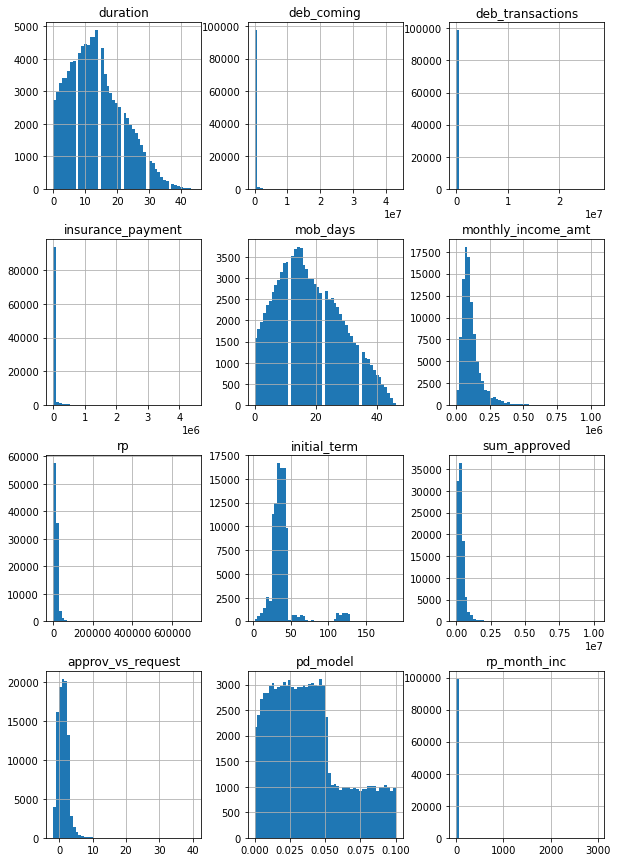

In [163]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data.hist(column=["duration", "deb_coming", "deb_transactions", "insurance_payment", 
                  "mob_days", "monthly_income_amt", "rp", "initial_term",
                  "sum_approved", "approv_vs_request", "pd_model", "rp_month_inc"], bins=50, ax=ax);

Необходимо отфильтровать выбросы:

In [164]:
#у признаков с большим числом нулевых значений квантили будем считать на основе подвыборок
ins_p_more0 = data[data.insurance_payment > 0]
deb_com_more0 = data[data.deb_coming > 0]
deb_trans_more0 = data[data.deb_transactions > 0]
rp_moth_inc_more0 = data[data.rp_month_inc > 0]

In [165]:
data = data[data.deb_coming <= deb_com_more0.deb_coming.quantile(0.95)]
data = data[data.deb_transactions <= deb_trans_more0.deb_transactions.quantile(0.95)]
data = data[data.insurance_payment <= ins_p_more0.insurance_payment.quantile(0.95)]
data = data[data.rp <= data.rp.quantile(0.95)]
data = data[data.approv_vs_request <= data.approv_vs_request.quantile(0.95)]
data = data[data.rp_month_inc <= data.rp_month_inc.quantile(0.95)]

Посмотрим на распределения признаков после удаления выбрососв 

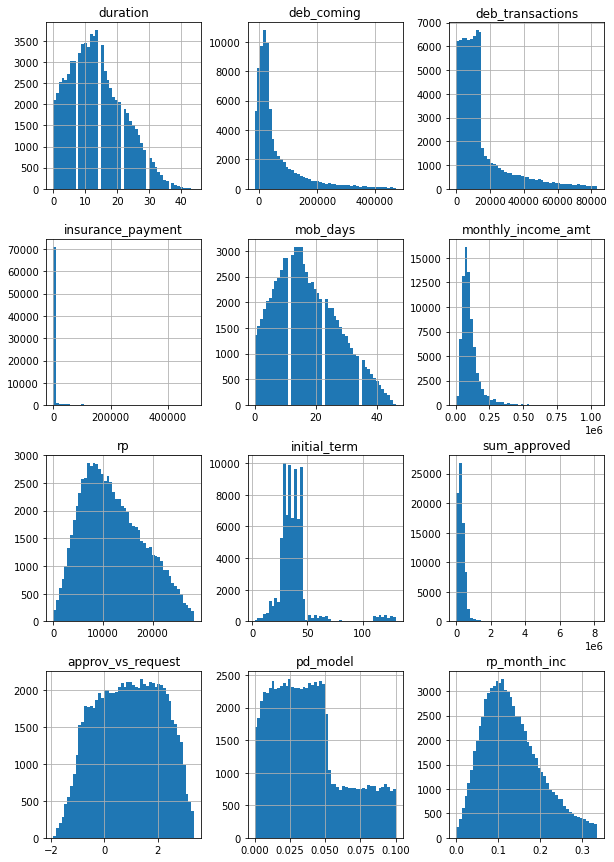

In [166]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data.hist(column=["duration", "deb_coming", "deb_transactions", "insurance_payment", 
                  "mob_days", "monthly_income_amt", "rp", "initial_term",
                  "sum_approved", "approv_vs_request", "pd_model", "rp_month_inc"], bins=50, ax=ax);

Возможно признак insurance_payment стоит исключить из рассмотрения

Значения признака tarif_type:

In [167]:
pd.unique(data.tarif_type)

array(['not_one', 'one'], dtype=object)

Для этого признака выполним преобразование  
one -> 1  
not_one -> 0

In [168]:
data.tarif_type = data.tarif_type.map({'not_one':0, 'one':1})

Следующие признаки исключим из рассмотрения

In [169]:
data.pop('utilization_dt'); #этот признак уже обработан
data.pop('Unnamed: 0'); #исходно неясно, что отражает этот признак
data.pop('account_rk'); #уникальный номер кредитного счета, задействовать в обучении нет смысла

Посмотрим на скоррелированность текущих признаков

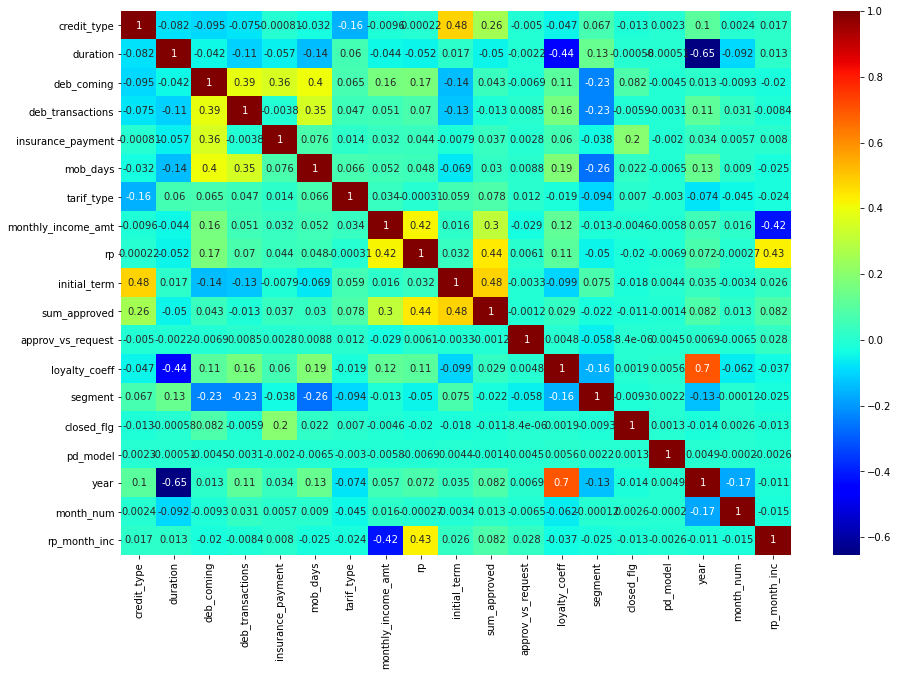

In [170]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,10))         
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap="jet", ax=ax);

Скоррелированные признаки:  
year и loyalty_coeff  
year и duration  
  
Можно подумать над тем, чтобы убрать какие-то из этих признаков из рассмотрения, но делать это лучше после того, как была построена хотя бы какая-то модель (чтобы сравнить качество двух моделей); однозначно выкидывать скоррелированные признаки можно, если корреляция близка к 1 (-1)

## Целевая переменная  
По условию задания необходимо предсказать вероятность закрытия кредита раньше половины срока.  
Получим вероятности закрытия следующим образом для каждого клиента:  
Если duration < (initial_term * 0.5) И closed_flg = 1 ---> искомая вероятность равна 1  
во всех остальных случаях вероятность равна 0

In [171]:
target_prob = np.zeros(len(data))
for i in range(len(data)):
    if (data.iloc[i].duration < (data.iloc[i].initial_term * 0.5)) and data.iloc[i].closed_flg == 1:
            target_prob[i] = 1

In [172]:
data_and_target = data.copy()
data_and_target['target'] = target_prob

Проверка числа примеров в классах 

In [173]:
print('Соотношение между классами:', len(data_and_target[data_and_target.target == 1])/len(data_and_target[data_and_target.target == 0]))
print('Примеров с вероятностью закрытия 1:', len(data_and_target[data_and_target.target == 1]))
print('Примеров с вероятностью закрытия 0:', len(data_and_target[data_and_target.target == 0]))

Соотношение между классами: 0.13259088656307397
Примеров с вероятностью закрытия 1: 9096
Примеров с вероятностью закрытия 0: 68602


Для того, чтобы "выровнять" классы попробуем случайным образом набрать подвыборку из выборки примеров с вероятностями, равными 0; при этом размер выборки должен быть сопоставим с выборкой с вероятностью 1 

In [174]:
data_and_target_1 = data_and_target[data_and_target.target == 1].copy()

In [175]:
data_and_target_0 = data_and_target[data_and_target.target == 0].sample(n=9100, random_state=10)

In [176]:
print(len(data_and_target_1))
print(len(data_and_target_0))
print('Новое соотношение между классами:', len(data_and_target_1)/len(data_and_target_0))

9096
9100
Новое соотношение между классами: 0.9995604395604396


In [177]:
final_data = pd.concat([data_and_target_1, data_and_target_0], axis=0)
final_data.sample(n=len(final_data), random_state=2)

,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,closed_flg,pd_model,year,month_num,rp_month_inc,target
188973,1,3.0,6020.0,16143.0,0.00,20.0,1,91680.0,4038.0,26.0,340000.0,0.066058,0.2626,1.0,1.0,0.048260,2020,9,0.044045,1.0
77552,1,6.0,86350.0,17974.0,50261.20,37.0,1,13764.0,1060.0,29.0,185000.0,0.016898,0.2697,4.0,1.0,0.016971,2020,4,0.077012,1.0
75252,1,24.0,55349.0,2142.0,0.00,3.0,1,104484.0,5782.0,32.0,45000.0,0.743178,0.0000,4.0,0.0,0.041806,2019,5,0.055339,0.0
20935,1,5.0,303080.0,9256.0,301878.36,29.0,1,69555.0,14788.0,43.0,390000.0,-0.297651,0.0000,4.0,1.0,0.005098,2019,8,0.212609,1.0
200796,1,11.0,388703.0,11945.0,351120.55,17.0,0,99731.0,21121.0,35.0,485000.0,-0.765570,0.0000,3.0,1.0,0.058961,2019,6,0.211780,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75094,1,8.0,35558.0,1578.0,0.00,16.0,1,44109.0,8477.0,36.0,275000.0,2.934425,0.2371,4.0,0.0,0.039741,2020,3,0.192183,0.0
25342,1,11.0,328521.0,35943.0,70000.00,21.0,1,140504.0,23045.0,45.0,865000.0,0.623776,0.3166,1.0,1.0,0.018894,2020,3,0.164017,1.0
51967,1,36.0,-11711.0,12165.0,0.00,16.0,1,32913.0,8230.0,41.0,315000.0,1.035522,0.0000,4.0,0.0,0.017212,2018,1,0.250053,0.0
153969,1,0.0,156549.0,27360.0,0.00,19.0,1,194942.0,11821.0,30.0,250000.0,-0.221765,0.0000,1.0,1.0,0.032233,2019,7,0.060639,1.0


После того как целевая переменная была сформирована, есть смысл убрать из рассмотрения closed_flg, потому что теперь между этим признаком и целевой переменной сильная корреляция

In [178]:
final_data['target'].corr(final_data['closed_flg'])

0.9312442686421947

In [179]:
final_data.pop('closed_flg');

In [180]:
final_data

,credit_type,duration,deb_coming,deb_transactions,insurance_payment,mob_days,tarif_type,monthly_income_amt,rp,initial_term,sum_approved,approv_vs_request,loyalty_coeff,segment,pd_model,year,month_num,rp_month_inc,target
18,1,21.0,230122.0,46087.0,0.00,11.0,1,86518.0,11031.0,44.0,285000.0,-0.237725,0.0000,4.0,0.009187,2018,7,0.127499,1.0
55,1,2.0,50885.0,6231.0,0.00,31.0,1,73176.0,7600.0,19.0,70000.0,-0.216481,0.0000,3.0,0.060938,2019,12,0.103859,1.0
146,1,7.0,110579.0,19326.0,0.00,32.0,1,127426.0,17385.0,28.0,340000.0,0.465964,0.4840,1.0,0.085706,2020,8,0.136432,1.0
147,1,4.0,75041.0,2192.0,52491.47,29.0,1,488479.0,7425.0,15.0,205000.0,-1.244232,0.6582,4.0,0.016580,2020,10,0.015200,1.0
151,1,14.0,45344.0,9417.0,0.00,12.0,1,95198.0,14077.0,39.0,410000.0,1.210179,0.0000,4.0,0.048985,2019,4,0.147871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144144,2,11.0,26331.0,5030.0,0.00,28.0,1,137673.0,3165.0,55.0,875000.0,0.254848,0.0000,3.0,0.076458,2020,11,0.022989,0.0
122836,1,23.0,-9597.0,128.0,0.00,1.0,1,80709.0,9453.0,45.0,280000.0,2.132855,0.0000,4.0,0.048842,2018,4,0.117124,0.0
182217,1,34.0,27991.0,7713.0,0.00,12.0,1,65945.0,12156.0,38.0,340000.0,-1.347041,0.0000,4.0,0.023845,2018,3,0.184335,0.0
62861,1,16.0,27508.0,13568.0,0.00,10.0,0,107263.0,23154.0,36.0,605000.0,2.395362,0.0000,4.0,0.001248,2018,10,0.215862,0.0


Далее разделим наши данные на обучающие и тестовые в соотношении 80%-20% (при бОльшем количестве примеров можно было бы "смещать" это соотношение в сторону 50%-50%) 

In [181]:
# x - вектор значений признаков, y - вектор со значениями целевой переменной
y = final_data.target.copy()
x = final_data.copy()
x.pop('target');

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=40)

In [183]:
print('соотношение между классами в обучающем наборе:', len(y_train[y_train == 1])/len(y_train[y_train == 0]))
print('соотношение между классами в тестовом наборе:', len(y_test[y_test == 1])/len(y_test[y_test == 0]))

соотношение между классами в обучающем наборе: 1.043234138124649
соотношение между классами в тестовом наборе: 0.9889329143325591


## Модель решающего дерева

Выполним обучение с кросс-валидацией

In [184]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree_params = {'max_depth': range(1,10),'max_features': range(3,18)}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:    3.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(3, 18)},
             verbose=True)

In [185]:
tree_grid.best_params_

{'max_depth': 4, 'max_features': 17}

Оценка важности переменных

In [186]:
c = tree_grid.best_estimator_.feature_importances_
for i,v in enumerate(c):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.54067
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01500
Feature: 4, Score: 0.17105
Feature: 5, Score: 0.01019
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01039
Feature: 9, Score: 0.24498
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00772
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000


In [187]:
print('Наиболее важные признаки (высокий score):')
print(X_train.columns[1], X_train.columns[4], X_train.columns[9],  X_train.columns[11], sep=', ')

Наиболее важные признаки (высокий score):
duration, insurance_payment, initial_term, approv_vs_request


### Оценка модели

In [188]:
y_pr_train = tree_grid.predict(X_train)
y_pr_test = tree_grid.predict(X_test)

In [189]:
print('Обучающий набор:', classification_report(y_train,y_pr_train), sep='\n')
print('Тестовый набор:', classification_report(y_test,y_pr_test), sep='\n')

Обучающий набор:
              precision    recall  f1-score   support

         0.0       0.86      0.41      0.56      1781
         1.0       0.62      0.93      0.75      1858

    accuracy                           0.68      3639
   macro avg       0.74      0.67      0.65      3639
weighted avg       0.74      0.68      0.65      3639

Тестовый набор:
              precision    recall  f1-score   support

         0.0       0.85      0.39      0.53      7319
         1.0       0.60      0.93      0.73      7238

    accuracy                           0.66     14557
   macro avg       0.72      0.66      0.63     14557
weighted avg       0.72      0.66      0.63     14557



Низкое значение recall - модель ошибочно относит много примеров к классу 0.

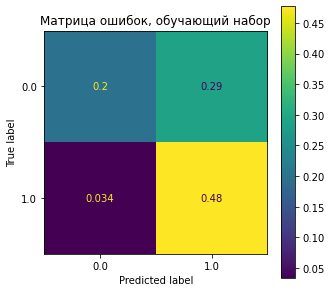

In [190]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(tree_grid, X_train, y_train, normalize='all', ax=ax);
plt.grid(False)
plt.title('Матрица ошибок, обучающий набор');

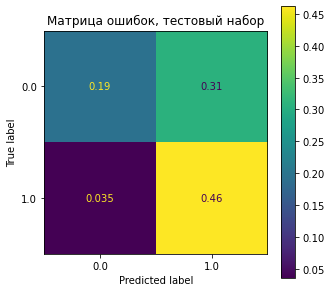

In [191]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(tree_grid, X_test, y_test, normalize='all', ax=ax);
plt.grid(False)
plt.title('Матрица ошибок, тестовый набор');

### ROC-AUC кривые  

In [192]:
def plot_roc_curve(x, y, classifier):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = classifier.predict_proba(x)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.grid()
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### На обучающем наборе

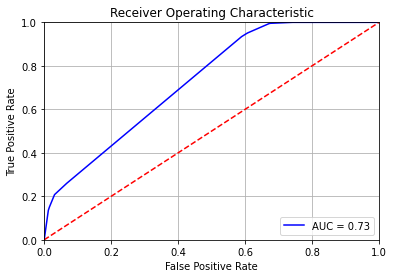

In [193]:
plot_roc_curve(X_train, y_train, tree_grid)

### На тестовом наборе

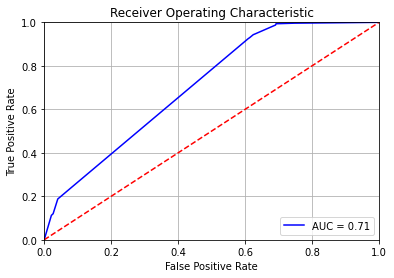

In [194]:
plot_roc_curve(X_test, y_test, tree_grid)

И на обучающем, и на тестовом наборе кривые расоположены низко, можно попробовать улучшить алгоритм

### Precision-Recall curve

Наш датасет сбалансирован в отношении числа примеров из двух классов, поэтому данные кривые могут оказаться не так полезны, тем не менее построим их

In [195]:
def plot_precision_recall_curve(X, y, classifier):
    probs = classifier.predict_proba(X)
    preds = probs[:,1]

    lr_precision, lr_recall, _ = precision_recall_curve(y, preds)
    lr_auc = auc(lr_recall, lr_precision)
    print('auc=%.3f' % (lr_auc))

    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label='Precision-Recall')
    plt.grid()
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

auc=0.759


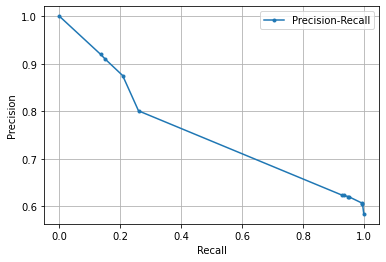

In [196]:
plot_precision_recall_curve(X_train, y_train, tree_grid)

auc=0.712


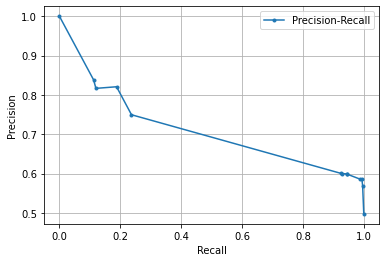

In [197]:
plot_precision_recall_curve(X_test, y_test, tree_grid)

Площадь под кривой на тестовом наборе 0.7  
Высокие значения recall достигаются при значениях precision 0.6-0.7. Это не самый плохой результат, но модель может быть улучшена.

## Обучение модели случайного леса

In [213]:
regressor = RandomForestClassifier(n_estimators=100,max_depth=7,random_state=5)
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

### Оценка модели случайного леса

Обучающий набор:
              precision    recall  f1-score   support

         0.0       0.91      0.55      0.68      1781
         1.0       0.69      0.95      0.80      1858

    accuracy                           0.75      3639
   macro avg       0.80      0.75      0.74      3639
weighted avg       0.79      0.75      0.74      3639



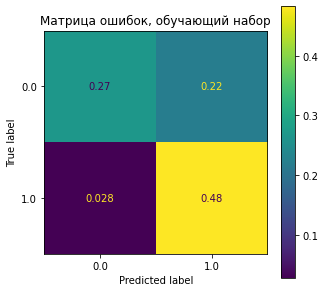

In [214]:
print('Обучающий набор:', classification_report(y_train,y_pred_train), sep='\n')
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(regressor, X_train, y_train, normalize='all', ax=ax);
plt.grid(False)
plt.title('Матрица ошибок, обучающий набор');

Тестовый набор:
              precision    recall  f1-score   support

         0.0       0.81      0.44      0.57      7319
         1.0       0.61      0.89      0.73      7238

    accuracy                           0.67     14557
   macro avg       0.71      0.67      0.65     14557
weighted avg       0.71      0.67      0.65     14557



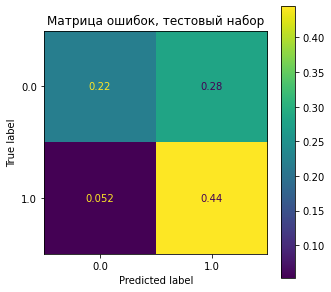

In [215]:
print('Тестовый набор:', classification_report(y_test,y_pred), sep='\n')
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(regressor, X_test, y_test, normalize='all', ax=ax);
plt.grid(False)
plt.title('Матрица ошибок, тестовый набор');

### Оценка важности переменных

In [201]:
c = regressor.feature_importances_
for i,v in enumerate(c):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01712
Feature: 1, Score: 0.32144
Feature: 2, Score: 0.05021
Feature: 3, Score: 0.03049
Feature: 4, Score: 0.13134
Feature: 5, Score: 0.02553
Feature: 6, Score: 0.00307
Feature: 7, Score: 0.03519
Feature: 8, Score: 0.03534
Feature: 9, Score: 0.08557
Feature: 10, Score: 0.03125
Feature: 11, Score: 0.03114
Feature: 12, Score: 0.03949
Feature: 13, Score: 0.00683
Feature: 14, Score: 0.03131
Feature: 15, Score: 0.06797
Feature: 16, Score: 0.02168
Feature: 17, Score: 0.03503


In [202]:
print('Наиболее важные признаки (высокий score):')
print(X_train.columns[1], X_train.columns[4], X_train.columns[9], sep=', ')

Наиболее важные признаки (высокий score):
duration, insurance_payment, initial_term


In [203]:
print('Признаки с наиболее низким score:')
print(X_train.columns[6], X_train.columns[13], sep=', ')

Признаки с наиболее низким score:
tarif_type, segment


### ROC-AUC кривые для случайного леса

Обучающий набор


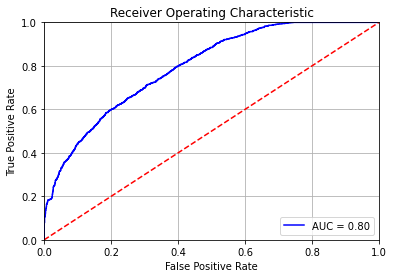

In [210]:
print('Обучающий набор')
plot_roc_curve(X_train, y_train, regressor)

Тестовый набор


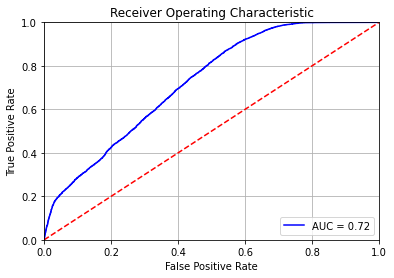

In [211]:
print('Тестовый набор')
plot_roc_curve(X_test, y_test, regressor)

Для модели случайного леса результат для обучающего набора лучше, однако на тесте почти нет изменений

Обучающий набор
auc=0.800


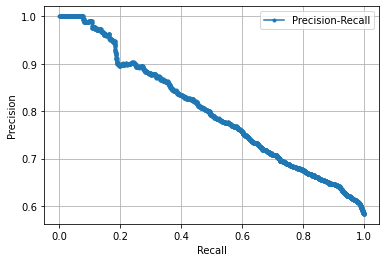

Тестовый набор
auc=0.700


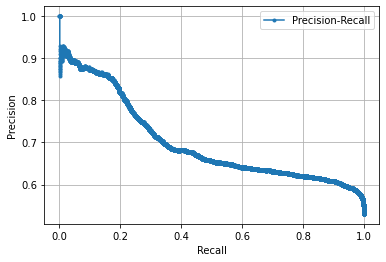

In [212]:
print('Обучающий набор')
plot_precision_recall_curve(X_train, y_train, regressor)
print('Тестовый набор')
plot_precision_recall_curve(X_test, y_test, regressor)

По-прежнему площадь под кривой на тестовом наборе 0.7 

Текущая обученная модель случайного леса работает недостаточно хорошо. Несмотря на достаточно высокое значение площади под кривыми на тесте, низкие значения Recall могут говорит о том, что модель имеет тенденцию к предсказыванию бОльшего числа примеров класса 1, чем есть на самом деле. Можно попробовать изменить тренировочный и тестовый набор, либо немного увеличить число примеров из класса 0, чтобы избавиться от этого негативного эффекта.  

## Процесс проверки стабильности модели во времени

Получая новые данные (скажем, в пределах одного месяца), мы можем попробовать также отслеживать изменения метрик precision/recall каждый месяц и сравнивать их с предыдущими значениями. Если в этих метриках есть резкие изменения, значит, необходимо посмотреть на новые данные (это может быть как временное явление, так и постоянное, при котором уже надо дополнить модель новыми переменными и обучить заново).  
Например, если бы в нашей модели каждый на новых данных изменилась бы метрика Recall (стала бы 0.2 вместо 0.44), можно было бы перепроверять модель - кажется, что она приближается к тому, чтобы все примеры записывать в класс 1.  
Также можно подсчитывать пропорцию "предсказанные закрытия в этом месяце/реальные закрытия кредита" просто чтобы увидеть, что она не меняется со временем (уменьшилась, например, - значит, модель что-то делает не так).